In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from exp.nb_05 import *

In [7]:
def sched_lin(start, end):
    def _inner(start,end,pos):return start + pos*(end-start)
    return partial(_inner,start,end)

In [15]:
def annealer(f):
    def _inner(start,end): return partial(f,start,end)
    return _inner

In [16]:
@annealer
def sched_lin(start, end, pos): return start + pos*(end-start)

In [17]:
f = sched_lin(1,2)
f(0.3)

1.3

In [19]:
@annealer
def sched_cos(start, end, pos): return start + (1 + math.cos(math.pi*(1-pos))) * (end-start) / 2
@annealer
def sched_no(start, end, pos):  return start
@annealer
def sched_exp(start, end, pos): return start * (end/start) ** pos

In [22]:
def cos_1cycle_anneal(start, high, end):
    return [sched_cos(start, high),sched_cos(high, end)]

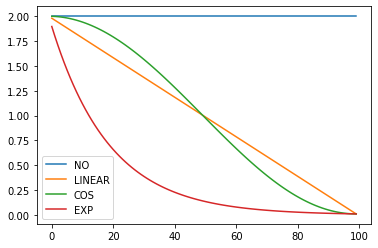

In [28]:
annealings = "NO LINEAR COS EXP".split()

a = torch.arange(0, 100)
p = torch.linspace(0.01, 1, 100)

fns = [sched_no, sched_lin, sched_cos, sched_exp]
for fn, title in zip(fns, annealings):
    f = fn(2,1e-2)
    plt.plot(a, [f(o) for o in p], label = title)
plt.legend();

In [ ]:
#export
def combine_scheds(pcts, scheds):
    assert sum(pcts) == 1.
    pcts = tensor([0] + listify(pcts))
    assert torch.all(pcts >= 0)
    pcts = torch.cumsum(pcts, 0)
    print(pcts)
    def _inner(pos):
        idx = (pos >= pcts).nonzero().max()
        while idx < len(pcts)-1:       ### This check will solve the bug
            actual_pos = (pos - pcts[idx]) / (pcts[idx+1] - pcts[idx])
            return scheds[idx](actual_pos.item())
    return _inner

In [47]:
pcts = [0.3, 0.7]
assert sum(pcts) == 1.
pcts = tensor([0] + listify(pcts))
assert torch.all(pcts >= 0)
pcts = torch.cumsum(pcts, 0)
print(pcts)

tensor([0.0000, 0.3000, 1.0000])


In [60]:
0.2 >= pcts, (0.2 >= pcts).nonzero(), (0.2 >= pcts).nonzero().max()

(tensor([ True, False, False]), tensor([[0]]), tensor(0))

In [65]:
pos = 0.99
pos >= pcts, (pos >= pcts).nonzero(), (pos >= pcts).nonzero().max()

(tensor([ True,  True, False]),
 tensor([[0],
         [1]]),
 tensor(1))

In [66]:
pos = 1
pos >= pcts, (pos >= pcts).nonzero(), (pos >= pcts).nonzero().max()

(tensor([True, True, True]),
 tensor([[0],
         [1],
         [2]]),
 tensor(2))

In [76]:
pos = 0.9
idx = (pos >= pcts).nonzero().max()
actual_pos = (pos - pcts[idx]) / (pcts[idx+1] - pcts[idx])

In [77]:
pos, pcts[idx], pcts[idx+1]

(0.9, tensor(0.3000), tensor(1.))

In [78]:
actual_pos

tensor(0.8571)

In [36]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 

In [40]:
p = torch.linspace(0.01,0.999,100)
a = torch.arange(0, 100)

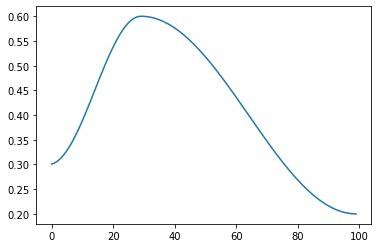

In [45]:
plt.plot([sched(o) for o in p])